In [1]:
from scipy.misc import imread
from sklearn.externals import joblib

import random as rand
import numpy as np 
import cv2
import glob
import time

import matplotlib.pyplot as plt
%matplotlib inline

from helpers import convert, show_images, put_boxes
from featuresourcer import FeatureSourcer
from binaryclassifier import BinaryClassifier
from slider import Slider

In [2]:
svc = joblib.load('svc2.pkl')
scaler = joblib.load('scaler2.pkl')

sourcer_params = {
  'color_model': 'yuv',                # hls, hsv, yuv, ycrcb
  'bounding_box_size': 64,             #
  'number_of_orientations': 11,        # 6 - 12
  'pixels_per_cell': 16,               # 8, 16
  'cells_per_block': 2,                # 1, 2
  'do_transform_sqrt': True
}

cls = BinaryClassifier(svc, scaler)
src = FeatureSourcer(sourcer_params, imread("vehicles/KITTI_extracted/5364.png"))
slider = Slider(sourcer = src, classifier = cls, increment = 8)

In [3]:
def bounding_boxes_test(this_frame, ws, wp):
    
  boxed_images = []
  strips = []
    
  for ws, wp in zip(ws, wp):
    bounding_boxes = slider.locate(frame = this_frame, window_size = ws, window_position = wp)
    img = put_boxes(this_frame, bounding_boxes)
    boxed_images.append(img)
    strips.append(slider.strip())

  show_images(strips, per_row = len(strips), per_col = 1, W = 15, H = 3)
  show_images(boxed_images, per_row = len(boxed_images), per_col = 1, W = 15, H = 3)

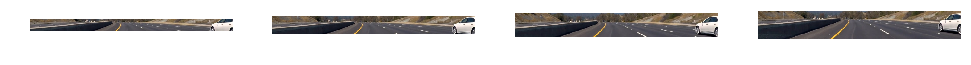

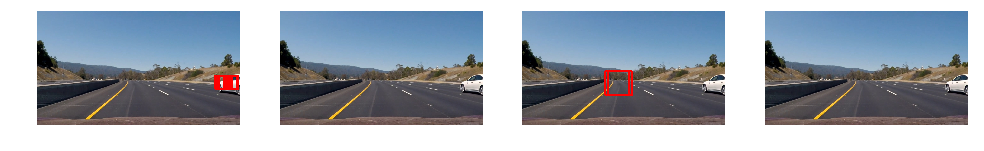

In [4]:
ws = 80, 120, 150, 180
wp = 410, 390, 380, 380

frame1 = imread("highway-05-07.jpg")

bounding_boxes_test(frame1, ws, wp)

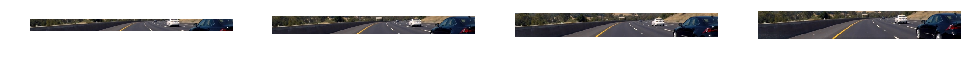

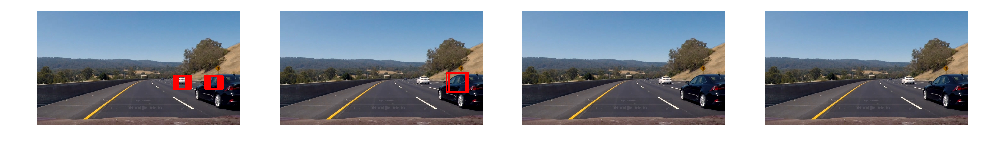

In [5]:
frame1 = imread("highway-28-30.jpg")

bounding_boxes_test(frame1, ws, wp)


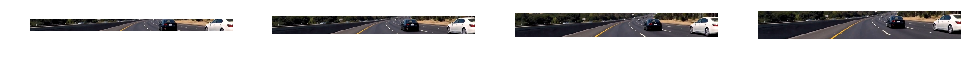

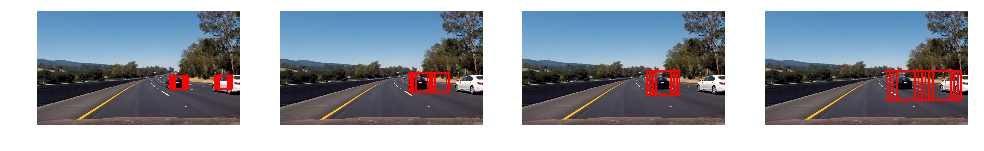

In [6]:
frame1 = imread("highway-42-44.jpg")

bounding_boxes_test(frame1, ws, wp)

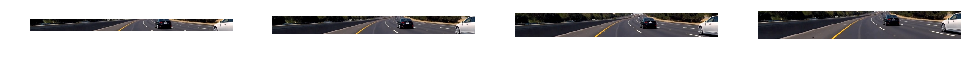

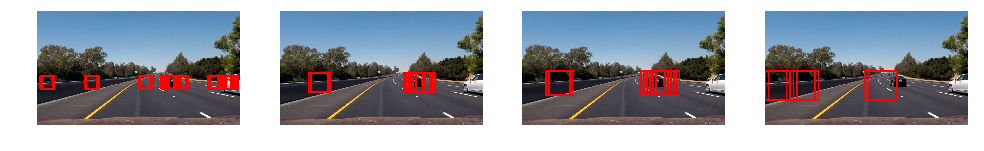

In [7]:
frame1 = imread("highway-45-46.jpg")

bounding_boxes_test(frame1, ws, wp)

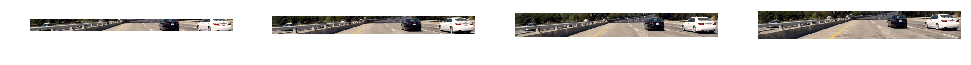

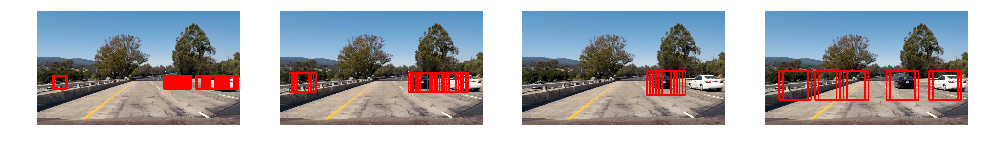

In [8]:
frame1 = imread("test1.jpg")
frame2 = imread("test2.jpg")
frame3 = imread("test3.jpg")
frame4 = imread("test4.jpg")
frame5 = imread("test5.jpg")
frame6 = imread("test6.jpg")

bounding_boxes_test(frame1, ws, wp)

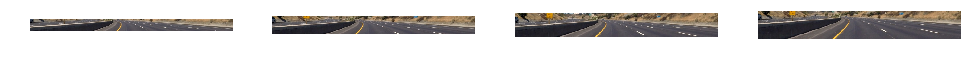

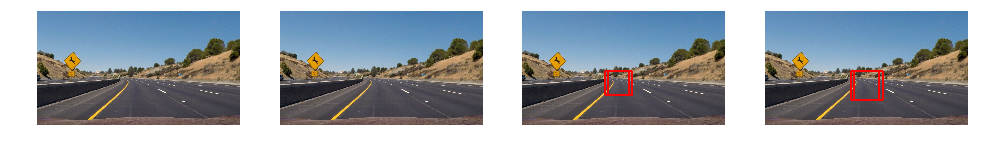

In [9]:
bounding_boxes_test(frame2, ws, wp)

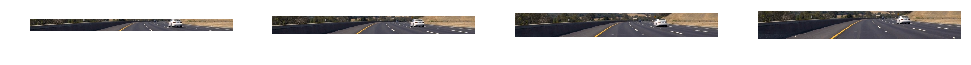

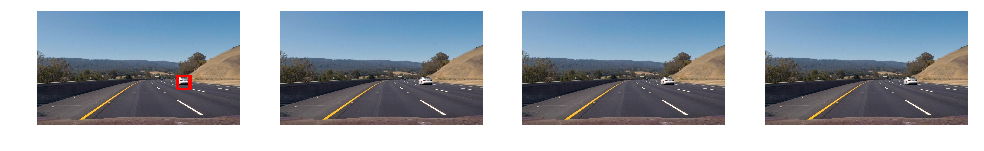

In [10]:
bounding_boxes_test(frame3, ws, wp)

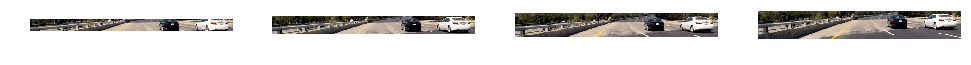

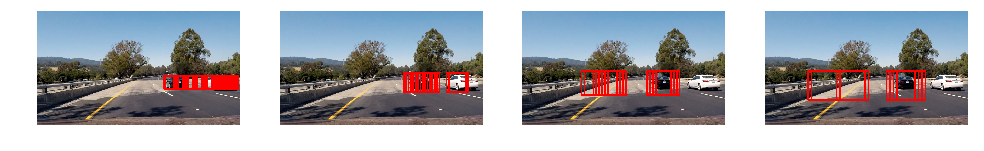

In [11]:
bounding_boxes_test(frame4, ws, wp)

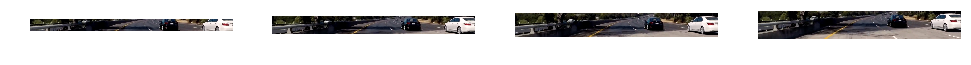

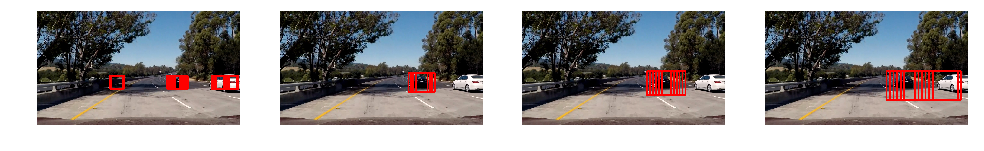

In [12]:
bounding_boxes_test(frame5, ws, wp)

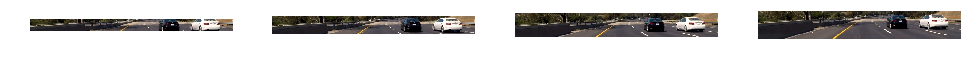

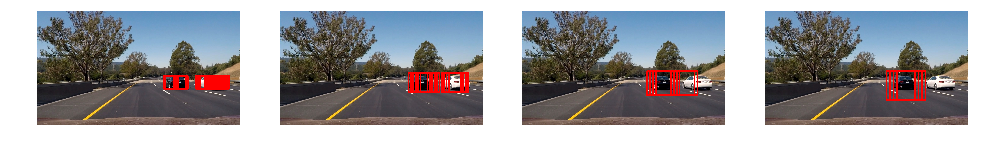

In [13]:
bounding_boxes_test(frame6, ws, wp)